In [6]:
#!pip install psycopg2

  Using cached psycopg2-2.9.1.tar.gz (379 kB)
    ERROR: Command errored out with exit status 1:
     command: /Users/juliebaker/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/pd/zt3rhrhj40l3fwfwrf5hm_yr0000gn/T/pip-install-zixmmwqa/psycopg2/setup.py'"'"'; __file__='"'"'/private/var/folders/pd/zt3rhrhj40l3fwfwrf5hm_yr0000gn/T/pip-install-zixmmwqa/psycopg2/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/pd/zt3rhrhj40l3fwfwrf5hm_yr0000gn/T/pip-pip-egg-info-lwjay15o
         cwd: /private/var/folders/pd/zt3rhrhj40l3fwfwrf5hm_yr0000gn/T/pip-install-zixmmwqa/psycopg2/
    Complete output (23 lines):
    running egg_info
    creating /private/var/folders/pd/zt3rhrhj40l3fwfwrf5hm_yr0000gn/T/pip-pip-egg-info-lwjay15o/psycopg2.egg-info
    writing /private/var/folders/pd/zt3

In [1]:
# import create_engine
from sqlalchemy import create_engine

In [6]:
# import pandas
import pandas as pd

In [5]:
import psycopg2 as pg

ImportError: dlopen(/Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/_psycopg.cpython-38-darwin.so, 2): Symbol not found: ____chkstk_darwin
  Referenced from: /Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/.dylibs/libcrypto.1.1.dylib (which was built for Mac OS X 10.15)
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/.dylibs/libcrypto.1.1.dylib

In [5]:
# engine = create_engine('postgresql://sql-challenge/EmployeeSQL/table_schemata.sql')

ImportError: dlopen(/Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/_psycopg.cpython-38-darwin.so, 2): Symbol not found: ____chkstk_darwin
  Referenced from: /Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/.dylibs/libcrypto.1.1.dylib (which was built for Mac OS X 10.15)
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/.dylibs/libcrypto.1.1.dylib

In [6]:
# This won't work because of previous errors
# connection = engine.connect()

NameError: name 'engine' is not defined

In [ ]:
# This won't work because of previous errors
all_salaries_df = pd.read_sql_table(table_schemata.sql,con=connection)

## Based on my own searching online & my TA searching online during our session, the above errors related to psycopg2 seem to come down to compatibility issues with my current os. We tried multiple uninstall & reinstall of psycopg2 & psycopg2-binary to try to fix it with no luck.
### I wanted to submit anyway just in case there are suggestions on anything else.

## importing directly from csv just so I can get the remainder of the code written
## while I wait for help trying to fix the software issues I'm having above

In [7]:
import os
import csv

In [8]:
# load files
# Files to Load 
load_dept = os.path.join(os.getcwd(), "departments.csv")
load_dept_emp = os.path.join(os.getcwd(), "dept_emp.csv")
# load_dept_man = os.path.join(os.getcwd(), "dept_manager.csv") # don't need this for these analyses
load_emp = os.path.join(os.getcwd(), "employees.csv") 
load_sal = os.path.join(os.getcwd(), "salaries.csv")
load_titles = os.path.join(os.getcwd(), "titles.csv")


In [9]:
# Read Files and store into Pandas data frames
dept_df = pd.read_csv(load_dept)
dept_emp_df = pd.read_csv(load_dept_emp)
# dept_man_df = pd.read_csv(load_dept_man) # don't need for these analyses
emp_df = pd.read_csv(load_emp)
sal_df = pd.read_csv(load_sal)
titles_df = pd.read_csv(load_titles)

In [10]:
# merge dept to dept_employees (need to do this first because there are some employees in multiple departments)
employee_depts_df = pd.merge(dept_df, dept_emp_df, on='dept_no')

In [11]:
employee_depts_df.head()

,dept_no,dept_name,emp_no
0,d001,Marketing,10017
1,d001,Marketing,10055
2,d001,Marketing,10058
3,d001,Marketing,10108
4,d001,Marketing,10140


In [12]:
# just doing this to make sure correct number of lines in df
len(employee_depts_df.dept_no)

331603

In [13]:
# merge previous frame to sal_df
employee_salaries_df = pd.merge(employee_depts_df, sal_df, on='emp_no')

In [14]:
# just doing this to make sure correct number of lines in df
len(employee_depts_df.dept_no)

331603

In [15]:
# merge previous to emp_df (because title code is on emp_df)
employees_notitles_df = pd.merge(employee_salaries_df, emp_df, on='emp_no')

In [16]:
# merge previous to titles_df
salary_analyses_df = pd.merge(employees_notitles_df, titles_df, left_on='emp_title_id', right_on='title_id')

In [17]:
salary_analyses_df.head()

,dept_no,dept_name,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,d001,Marketing,10017,71380,s0001,7/6/1958,Cristinel,Bouloucos,F,8/3/1993,s0001,Staff
1,d001,Marketing,10055,80024,s0001,6/6/1956,Georgy,Dredge,M,4/27/1992,s0001,Staff
2,d001,Marketing,10108,40000,s0001,4/7/1952,Lunjin,Giveon,M,10/2/1986,s0001,Staff
3,d003,Human Resources,10108,40000,s0001,4/7/1952,Lunjin,Giveon,M,10/2/1986,s0001,Staff
4,d001,Marketing,10140,61352,s0001,3/11/1957,Yucel,Auria,F,3/14/1991,s0001,Staff


In [18]:
# just doing this to make sure correct number of lines in df
len(salary_analyses_df.dept_no)

331603

In [19]:
# once loaded into df do the following
all_salaries_df = salary_analyses_df

In [20]:
# run basic descriptives to try to determing salary ranges to use for histogram
salary_analyses_df['salary'].describe()

count    331603.000000
mean      52972.225432
std       14299.003001
min       40000.000000
25%       40000.000000
50%       48691.000000
75%       61765.000000
max      129492.000000
Name: salary, dtype: float64

In [21]:
salary_analyses_df['emp_no'].nunique()

300024

In [25]:
#salary_analyses_df.groupby['emp_no']['salary'].mean()

In [23]:
## Looking at number of employees and unique salary values
unique_employees = all_salaries_df['emp_no'].nunique()
unique_salaries = all_salaries_df['salary'].nunique()
print(f"There are {unique_employees}\n There are {unique_salaries} values of salaries")

There are 300024
 There are 50355 values of salaries


In [26]:
# esatblish bins for ranges
bins = [0, 40000, 44999, 49999, 54999, 59999, 64999, 69999, 74999, 79999, 89999, 130000]
salary_labels = ["$40k", "$40-45k", "$45-50k", "$50-55k", "$55-60k", "$60-65k", "$65-70k", "$70-75k", "$75-80k", "$80-90k", "90k+"]

In [27]:
# use pd.cut() to categorize employees using salary bins
salary_bin_df = all_salaries_df
salary_bin_df["salary_grp"] = pd.cut(salary_bin_df["salary"], bins, labels=salary_labels, include_lowest=False)

In [28]:
salary_bin_df

,dept_no,dept_name,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary_grp
0,d001,Marketing,10017,71380,s0001,7/6/1958,Cristinel,Bouloucos,F,8/3/1993,s0001,Staff,$70-75k
1,d001,Marketing,10055,80024,s0001,6/6/1956,Georgy,Dredge,M,4/27/1992,s0001,Staff,$80-90k
2,d001,Marketing,10108,40000,s0001,4/7/1952,Lunjin,Giveon,M,10/2/1986,s0001,Staff,$40k
3,d003,Human Resources,10108,40000,s0001,4/7/1952,Lunjin,Giveon,M,10/2/1986,s0001,Staff,$40k
4,d001,Marketing,10140,61352,s0001,3/11/1957,Yucel,Auria,F,3/14/1991,s0001,Staff,$60-65k
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331598,d006,Quality Management,498537,45360,e0004,6/5/1959,Muneo,Sabnani,M,10/20/1986,e0004,Technique Leader,$45-50k
331599,d006,Quality Management,499067,40000,e0004,3/1/1962,Vasilii,Lalonde,M,4/25/1987,e0004,Technique Leader,$40k
331600,d006,Quality Management,499218,40000,e0004,7/31/1962,Marl,Percebois,M,3/29/1987,e0004,Technique Leader,$40k
331601,d006,Quality Management,499236,82366,e0004,11/15/1953,Filipe,Khalid,F,1/19/1995,e0004,Technique Leader,$80-90k


In [45]:
emp_sal_sum_df = pd.DataFrame(salary_bin_df.groupby('salary')['emp_no'].nunique())

In [29]:
# salary demographics; counts members for each salary group & drops duplicates based on 'emp_no'
salary_counts_df = salary_bin_df.groupby('salary_grp')['emp_no'].nunique()

In [30]:
salary_counts_df = pd.DataFrame(salary_counts_df)
salary_counts_df

,emp_no
salary_grp,
$40k,95346
$40-45k,30925
$45-50k,32194
$50-55k,30871
$55-60k,27044
$60-65k,22896
$65-70k,18517
$70-75k,14213
$75-80k,10601


In [ ]:
## don't think I need this code for employees
# AGE ANALYSIS NEEDS:  group count, percent of players
# I couldn't get it to add my calculated column to the df above, so I created this one & merged them. AND THEN...it was totally fine with me adding a calculated column.
age_counts_df3 = age_df.groupby('Age Group')['SN'].nunique()
age_demos_df = pd.merge(age_counts_df2, age_counts_df3, on='Age Group')
age_demos_df

NameError: name 'age_df' is not defined

In [31]:
# purchase count
#purchase_byAge_df = age_df.groupby('Age Group')['SN'].count()

In [32]:
import matplotlib as plt

# create histogram to visualize most common salary ranges for employees

<AxesSubplot:xlabel='salary_grp'>

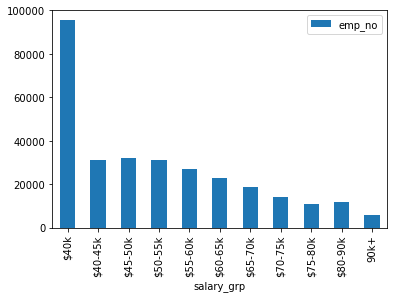

In [47]:
salary_counts_df.plot(kind='bar')

In [9]:
# creat bar chart of average salary by title
# be sure to filter so no duplicates for people in multiple departments

In [62]:
salary_title_df = salary_bin_df.groupby('title').mean()
salary_title_df = salary_title_df.reset_index()
salary_title_df

,title,emp_no,salary
0,Assistant Engineer,254103.701757,48615.074794
1,Engineer,253524.102625,48533.339845
2,Manager,110780.833333,51531.041667
3,Senior Engineer,253126.972571,48505.714313
4,Senior Staff,254320.012266,58557.394072
5,Staff,253351.855077,58460.049489
6,Technique Leader,252100.485472,48574.320997


<AxesSubplot:xlabel='title'>

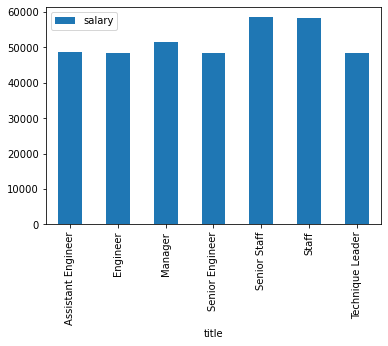

In [65]:
salary_title_df.plot.bar(x='title', y='salary')

In [76]:
# search your ID number
id_search = all_salaries_df[all_salaries_df["emp_no"] == 499942]
id_search

,dept_no,dept_name,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title,salary_grp
330281,d005,Development,499942,40000,e0004,1/10/1963,April,Foolsday,F,2/10/1997,e0004,Technique Leader,$40k
